# Single Neuron Reconstruction

## Part 1: Overview of Data

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pickle

from deep_neurographs import evaluation as evaluator, inference, visualization as viz
from deep_neurographs.utils import ml_util, util


### Load Data

In [2]:
# Parameters
brain_id = "706301"
example_id = "000"
plot_bool = False

# Read graph
input_filename = f"input_graph_{brain_id}-{example_id}.pkl"
path = f"./input_graphs/{input_filename}"
with open(path, "rb") as file:
    input_graph = pickle.load(file)
print(type(input_graph))

<class 'deep_neurographs.fragments_graph.FragmentsGraph'>


### Graph Structure and Attributes

In [3]:
node = util.sample_once(input_graph.nodes)
print("Node attributes:", input_graph.nodes[node])

Node attributes: {'proposals': set(), 'radius': 2.876378, 'swc_id': '8620232733', 'xyz': array([20653.936, 15505.35 , 24001.533], dtype=float32)}


In [4]:
edge = util.sample_once(input_graph.edges)
print("Edge attributes:", input_graph.edges[edge])

Edge attributes: {'length': 121.89750123023987, 'radius': array([2.244, 2.877, 2.992, 3.098, 3.242, 3.154, 3.098, 3.328, 3.328,
       3.098, 3.492, 3.352, 3.672, 3.82 , 4.035, 3.82 , 3.672, 4.035,
       4.035, 3.676, 3.896, 3.752, 3.746, 3.896, 3.871, 3.492, 3.676,
       3.871, 3.74 , 3.74 , 3.74 , 3.676, 3.346, 3.328, 3.242, 3.092,
       3.346, 3.242, 3.328, 3.492, 3.74 , 3.492, 3.492, 3.74 , 3.74 ,
       3.814, 4.15 , 3.871, 4.15 , 3.943, 3.752, 3.896, 3.6  , 3.676,
       3.492, 3.752, 3.896, 3.672, 3.746, 3.746, 3.871, 3.74 , 3.752,
       3.672, 3.896, 3.871, 3.6  , 3.676, 3.6  , 3.6  , 3.676, 3.74 ,
       4.15 , 3.871, 3.492, 3.676, 4.15 , 3.896, 3.676, 3.6  , 3.6  ,
       3.752, 3.672, 3.676, 3.74 , 3.74 , 3.896, 3.814, 3.74 , 3.896,
       3.676, 3.672, 3.752, 3.896, 3.896, 3.752, 3.676, 3.752, 3.896,
       3.752, 3.896, 3.672, 3.82 , 3.752, 3.752, 3.6  , 3.6  , 3.672,
       3.672, 3.006, 2.568, 2.135, 1.948], dtype=float16), 'xyz': array([[20663.166 , 15373.55  , 2421

In [5]:
if plot_bool:
    viz.visualize_graph(input_graph)

### Proposal Generation

In [6]:
print("Example of a proposal:", util.sample_once(input_graph.proposals))

Example of a proposal: frozenset({845, 247})


In [7]:
print("# Proposals:", len(input_graph.proposals))

# Proposals: 450


In [8]:
if plot_bool:
    viz.visualize_proposals(input_graph, color="orange")

### Ground Truth

In [9]:
p = util.sample_once(input_graph.gt_accepts)
print("This is a proposal that should be accepted:", p)

This is a proposal that should be accepted: frozenset({849, 810})


In [10]:
groundtruth_filename = f"groundtruth_graph_{brain_id}-{example_id}.pkl"
path = f"./groundtruth_graphs/{groundtruth_filename}"
with open(path, "rb") as file:
    groundtruth_graph = pickle.load(file)

In [11]:
if plot_bool:
    viz.visualize_subset(
        input_graph,
        input_graph.gt_accepts,
        proposal_subset=True,
        color="orange",
        groundtruth_graph=groundtruth_graph
    )

## Part 2: Inference

### Features

In [12]:
features_filename = f"input_graph_features_{brain_id}-{example_id}.pkl"
with open(f"./features/{features_filename}", "rb") as file:
    features = pickle.load(file)
print("type(features):", type(features))
print("features.keys():", features.keys())

type(features): <class 'dict'>
features.keys(): dict_keys(['nodes', 'branches', 'proposals'])


In [13]:
# Node features
node = util.sample_once(input_graph.nodes)
print("Node features:", features["nodes"][node])

# Branch features
branch = util.sample_once(input_graph.edges)
print("Branch features:", features["branches"][frozenset(branch)])

# Proposal features
proposal = util.sample_once(input_graph.proposals)
print("Proposal features:", features["proposals"][proposal])

Node features: [1.        1.9487226 1.       ]
Branch features: [3.5703125 0.4495839]
Proposal features: [ 1.02664757  1.          1.9487226   0.74800003  0.94381189  0.93759209
 -0.77196389  0.97471601  0.94499475 -0.87623787  0.98620063  0.93834901
 -0.88250554  0.98620063  0.93834901 -0.88250554  0.32191781  0.32191781
  0.36986301  0.34246575  0.32191781  0.25342466  0.24657534  0.33561644
  0.24657534  0.33561644  0.23287671  0.28082192  0.21917808  0.25342466
  0.20547945  0.21232877  0.28125     0.0519075 ]


### Dataset

In [14]:
dataset = ml_util.init_dataset(
    input_graph,
    features,
    computation_graph=input_graph
)

In [15]:
print("Dataset Attributes:", dataset.__dict__.keys())

Dataset Attributes: dict_keys(['idxs_branches', 'idxs_proposals', 'computation_graph', 'proposals', 'node_types', 'edge_types', 'data', 'n_edge_attrs'])


In [16]:
print("Index mappings for proposals:", dataset.idxs_proposals.keys())

Index mappings for proposals: dict_keys(['idx_to_id', 'id_to_idx'])


In [17]:
proposal = util.sample_once(input_graph.proposals)
idx = dataset.idxs_proposals["id_to_idx"][proposal]
print(f"The feature vector of proposal '{proposal}' is in the {idx}-th row of the feature matrix dataset.data['proposal'].x")

The feature vector of proposal 'frozenset({621, 606})' is in the 280-th row of the feature matrix dataset.data['proposal'].x


In [18]:
print(features["proposals"][proposal] - np.array(dataset.data["proposal"].x[idx]))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.54461813e-09  4.85154086e-09  4.85154086e-09 -2.07923179e-09
 -2.07923179e-09 -2.07923179e-09 -2.07923179e-09  6.93077262e-10
  6.93077262e-10  6.93077262e-10  6.93077262e-10  4.85154084e-09
  5.89115676e-09  5.89115676e-09  5.89115676e-09  5.89115676e-09
  7.27731128e-09 -6.74622871e-10]


### Prediction

In [19]:
# Load model
model_path = "neuron_reconstruction/GraphNeuralNet-2024-10-12.pth"
model = ml_util.load_model(model_path)

# Generate proposal prediction
preds_vector = inference.predict_with_gnn(model, dataset.data, device="cpu")
preds_dict = {dataset.idxs_proposals["idx_to_id"][i]: p for i, p in enumerate(preds_vector)}

/opt/conda/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [20]:
proposal = util.sample_once(input_graph.proposals)
print(f"Edge belief of proposal '{proposal}' is {preds_dict[proposal]}")

Edge belief of proposal 'frozenset({187, 54})' is 0.044652752578258514


### Accepted Proposals

In [21]:
acceptance_threshold = 0.75
accepts = inference.get_accepts(input_graph, preds_dict, acceptance_threshold)

print("% Proposals Accepted:", len(accepts) / input_graph.n_proposals())

% Proposals Accepted: 0.4022222222222222


### Results

In [22]:
gt_accept_beliefs = np.array([preds_dict[p] for p in input_graph.gt_accepts])
gt_reject_beliefs = np.array([preds_dict[p] for p in input_graph.proposals if p not in input_graph.gt_accepts])

print("Median belief of proposals in gt accepts:", np.median(gt_accept_beliefs))
print("Median belief of proposals not in gt accepts:", np.median(gt_reject_beliefs))

Median belief of proposals in gt accepts: 0.8532154560089111
Median belief of proposals not in gt accepts: 0.1485665887594223


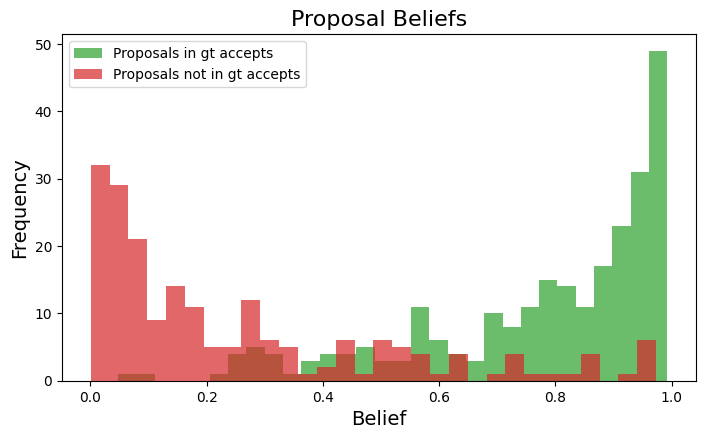

In [23]:
plt.figure(figsize=(18, 4.5))

plt.subplot(1, 2, 1)
plt.hist(gt_accept_beliefs, bins=30, color='tab:green', alpha=0.7, label='Proposals in gt accepts')
plt.hist(gt_reject_beliefs, bins=30, color='tab:red', alpha=0.7, label='Proposals not in gt accepts')
plt.xlabel('Belief', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Proposal Beliefs', fontsize=16)
plt.legend()

In [24]:
# Evaluation
results = evaluator.run_evaluation(input_graph, input_graph.list_proposals(), accepts)

# Report results
results = results["Overall"]
for metric in results:
    print(f"   {metric} = {np.round(results[metric], 4)}")


   # splits fixed = 167
   # merges created = 14
   accuracy_dif = 0.22
   accuracy = 0.78
   precision = 0.9227
   recall = 0.6627
   f1 = 0.7714
